<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/Cx-theileri_varaible%20RFECV%20modelisation%20Vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
Cl = '/content/classeurbb.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-5.283333,35.633333,1,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
224,-5.325286,35.685852,1,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
225,-5.833954,35.759465,1

In [4]:
X = data.loc[:, data.columns != 'Cx_theileri']
Y = data.Cx_theileri

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-5.283333,35.633333,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
224,-5.325286,35.685852,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,93,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
225,-5.833954,35.

In [6]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
223    1
224    1
225    1
226    1
227    1
Name: Cx_theileri, Length: 228, dtype: int64

In [7]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)

In [8]:
 from sklearn.feature_selection import SelectFromModel,RFECV
 from sklearn.model_selection import StratifiedKFold


# xgboost

In [9]:
feature_selected1=['Arbrisseau', 'Amp2_IRM', 'VarT_Cy_IRM', 'Amp2_TempJ', 'Amp2_TempN',
       'Amp3_TempN', 'VarT_cy_TempN', 'Ph1_TempN', 'Moy_NDVI', 'Ph1_NDVI',
       'Moy_EVI', 'Ph2_EVI', 'Rugosite_Min', 'Bio_Tj_Moy', 'Bio_Thum_Moy',
       'Bio_Pre_Saison', 'Prec_Mars', 'Prec_Nov', 'Rad_Juin', 'Rad_Juill']

In [10]:
 x_rfe1=X[feature_selected1]

In [11]:
 x_rfe1

,Arbrisseau,Amp2_IRM,VarT_Cy_IRM,Amp2_TempJ,Amp2_TempN,Amp3_TempN,VarT_cy_TempN,Ph1_TempN,Moy_NDVI,Ph1_NDVI,Moy_EVI,Ph2_EVI,Rugosite_Min,Bio_Tj_Moy,Bio_Thum_Moy,Bio_Pre_Saison,Prec_Mars,Prec_Nov,Rad_Juin,Rad_Juill
0,0,110,49,83,44,5,75,768,1106,953,2906,419,3,7.125000,22.050000,105.140599,1,4,25088,23739
1,0,10,73,126,55,18,80,721,1082,137,2596,243,2,9.816667,20.200000,77.394709,2,7,24129,23135
2,0,10,73,126,55,18,80,721,1082,137,2596,243,2,9.816667,20.200000,77.394709,2,7,24129,23135
3,0,40,48,120,61,21,76,717,1090,1047,2578,372,19,9.558333,20.350000,84.137238,1,7,24050,23055
4,0,70,18,115,58,14,79,722,1060,474,2190,21,8,9.616666,20.500000,79.471941,1,6,23963,23035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0,10,74,0,0,0,0,0,1204,94,3341,379,3,6.875000,13.483333,75.390541,68,70,25823,26270
224,0,50,87,68,33,3,93,695,1211,149,3300,239,7,5.700000,14.216667,75.660918,72,77,25859,25964
225,0,30,88,46,35,5,92,685,1222,158,3075,401,12,6.666667,13.916667,75.072807,95,126,26169,27084
226,13,70,80,78,40,1,94,701,1512,140,5253,459,62,5.891667,12.766667,79.066686,88,90,25791,26073


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

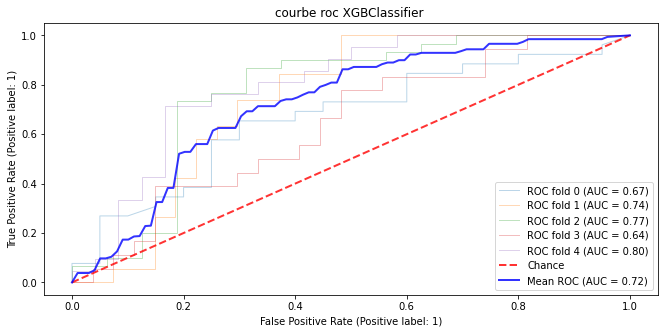

Accuracy: [0.65217391 0.7173913  0.73913043 0.62222222 0.71111111]
moy_accuracy: 0.69
precision: [0.75       0.63636364 0.875      0.51851852 0.75      ]
moy_precision: 0.71
sensibilité : [0.57692308 0.73684211 0.7        0.77777778 0.57142857]
moy_sensibilité: 0.67
spécificité : [0.75       0.7037037  0.8125     0.51851852 0.83333333]
moy_spécificité: 0.72
MCC : [0.32692308 0.43424297 0.48864958 0.2962963  0.42184792]
MCC: 0.39
balanced_accuracy : [0.66346154 0.7202729  0.75625    0.64814815 0.70238095]
balanced_accuracy: 0.70
roc_auc : [0.66730769 0.74074074 0.77083333 0.63580247 0.79761905]
roc_auc: 0.72
cohen_kappa_scorec : [0.31598513 0.43047619 0.47126437 0.27350427 0.41087613]
cohen_kappa_scorec: 0.38
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

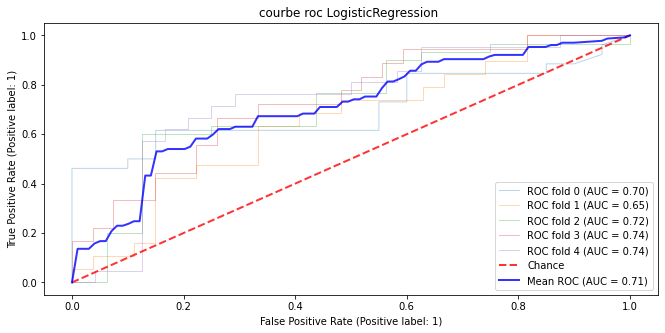

Accuracy: [0.67391304 0.65217391 0.65217391 0.64444444 0.71111111]
moy_accuracy: 0.67
precision: [0.82352941 0.57142857 0.75       0.54166667 0.72222222]
moy_precision: 0.68
sensibilité : [0.53846154 0.63157895 0.7        0.72222222 0.61904762]
moy_sensibilité: 0.64
spécificité : [0.85       0.66666667 0.5625     0.59259259 0.79166667]
moy_spécificité: 0.69
MCC : [0.39895714 0.29481739 0.25617377 0.30914201 0.41825096]
MCC: 0.34
balanced_accuracy : [0.69423077 0.64912281 0.63125    0.65740741 0.70535714]
balanced_accuracy: 0.67
roc_auc : [0.70384615 0.64912281 0.71666667 0.73662551 0.73611111]
roc_auc: 0.71
cohen_kappa_scorec : [0.36928702 0.29366603 0.25506073 0.29824561 0.41441441]
cohen_kappa_scorec: 0.33
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

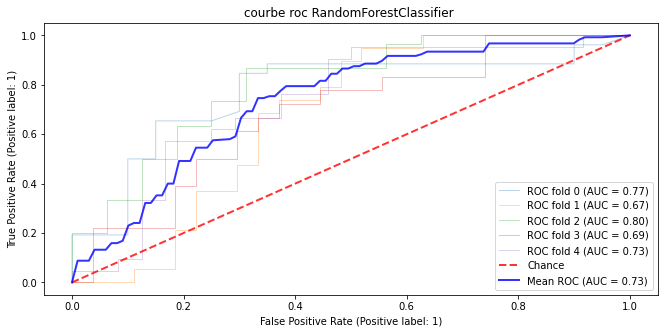

Accuracy: [0.7173913  0.63043478 0.67391304 0.64444444 0.68888889]
moy_accuracy: 0.67
precision: [0.80952381 0.55       0.82608696 0.53846154 0.70588235]
moy_precision: 0.69
sensibilité : [0.65384615 0.57894737 0.63333333 0.77777778 0.57142857]
moy_sensibilité: 0.64
spécificité : [0.8        0.66666667 0.75       0.55555556 0.79166667]
moy_spécificité: 0.71
MCC : [0.45167981 0.24395526 0.36514837 0.33062326 0.37362192]
MCC: 0.35
balanced_accuracy : [0.72692308 0.62280702 0.69166667 0.66666667 0.68154762]
balanced_accuracy: 0.68
roc_auc : [0.76923077 0.67446394 0.80208333 0.68518519 0.73214286]
roc_auc: 0.73
cohen_kappa_scorec : [0.4411215  0.24371373 0.34782609 0.31034483 0.36746988]
cohen_kappa_scorec: 0.34
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

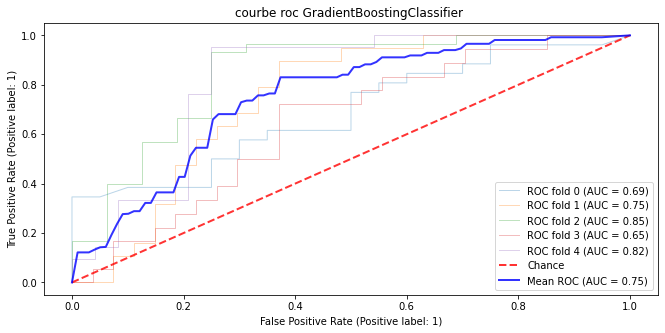

Accuracy: [0.60869565 0.7173913  0.82608696 0.66666667 0.75555556]
moy_accuracy: 0.71
precision: [0.72222222 0.625      0.86666667 0.56521739 0.75      ]
moy_precision: 0.71
sensibilité : [0.5        0.78947368 0.86666667 0.72222222 0.71428571]
moy_sensibilité: 0.72
spécificité : [0.75       0.66666667 0.75       0.62962963 0.79166667]
moy_spécificité: 0.72
MCC : [0.25393725 0.4496144  0.61666667 0.34482815 0.50797216]
MCC: 0.43
balanced_accuracy : [0.625      0.72807018 0.80833333 0.67592593 0.75297619]
balanced_accuracy: 0.72
roc_auc : [0.68846154 0.74853801 0.84583333 0.64609053 0.81944444]
roc_auc: 0.75
cohen_kappa_scorec : [0.23897059 0.43902439 0.61666667 0.33628319 0.50746269]
cohen_kappa_scorec: 0.43
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

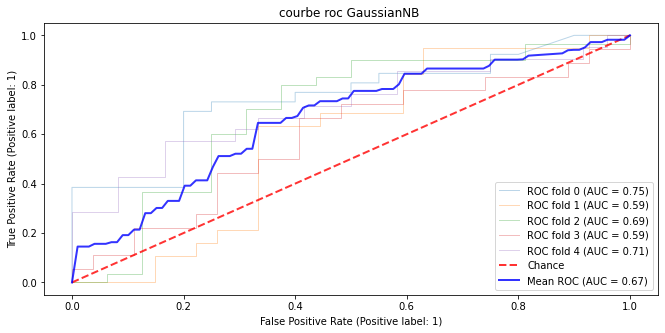

Accuracy: [0.65217391 0.54347826 0.69565217 0.51111111 0.62222222]
moy_accuracy: 0.60
precision: [0.64705882 0.46666667 0.71052632 0.4375     0.58333333]
moy_precision: 0.57
sensibilité : [0.84615385 0.73684211 0.9        0.77777778 0.66666667]
moy_sensibilité: 0.79
spécificité : [0.4        0.40740741 0.3125     0.33333333 0.58333333]
moy_spécificité: 0.41
MCC : [0.27789339 0.14912567 0.26701937 0.12009612 0.25      ]
MCC: 0.21
balanced_accuracy : [0.62307692 0.57212476 0.60625    0.55555556 0.625     ]
balanced_accuracy: 0.60
roc_auc : [0.75       0.58674464 0.69375    0.58641975 0.71031746]
roc_auc: 0.67
cohen_kappa_scorec : [0.25806452 0.13285458 0.24056604 0.09836066 0.24778761]
cohen_kappa_scorec: 0.20
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

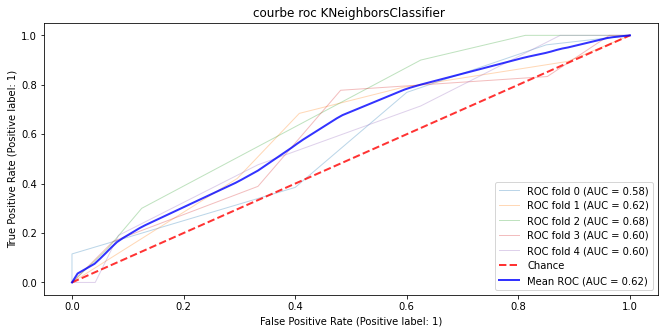

Accuracy: [0.47826087 0.63043478 0.60869565 0.62222222 0.57777778]
moy_accuracy: 0.58
precision: [0.55555556 0.54166667 0.75       0.51851852 0.55555556]
moy_precision: 0.58
sensibilité : [0.38461538 0.68421053 0.6        0.77777778 0.47619048]
moy_sensibilité: 0.58
spécificité : [0.6        0.59259259 0.625      0.51851852 0.66666667]
moy_spécificité: 0.60
MCC : [-0.01562691  0.27284293  0.21452908  0.2962963   0.14547859]
MCC: 0.18
balanced_accuracy : [0.49230769 0.63840156 0.6125     0.64814815 0.57142857]
balanced_accuracy: 0.59
roc_auc : [0.57884615 0.61500975 0.68333333 0.60185185 0.60019841]
roc_auc: 0.62
cohen_kappa_scorec : [-0.01470588  0.26641651  0.20689655  0.27350427  0.14414414]
cohen_kappa_scorec: 0.18


In [18]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# logistique

In [13]:
feature_selected2=['Prec_Nov']

In [14]:
 x_rfe2=X[feature_selected2]

In [15]:
 x_rfe2

,Prec_Nov
0,4
1,7
2,7
3,7
4,6
...,...
223,70
224,77
225,126
226,90


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

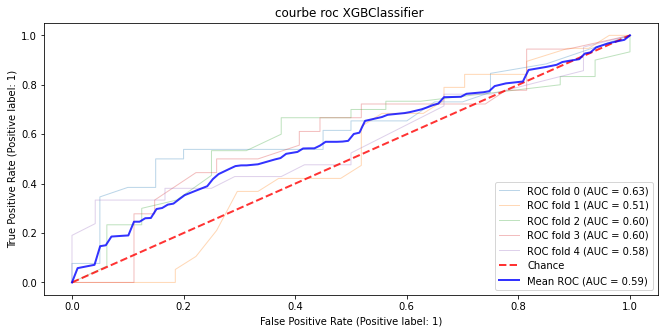

Accuracy: [0.54347826 0.47826087 0.60869565 0.57777778 0.53333333]
moy_accuracy: 0.55
precision: [0.60869565 0.39130435 0.8        0.47619048 0.5       ]
moy_precision: 0.56
sensibilité : [0.53846154 0.47368421 0.53333333 0.55555556 0.47619048]
moy_sensibilité: 0.52
spécificité : [0.55       0.48148148 0.75       0.59259259 0.58333333]
moy_spécificité: 0.59
MCC : [ 0.0877058  -0.04415108  0.27221786  0.14547859  0.05976143]
MCC: 0.10
balanced_accuracy : [0.54423077 0.47758285 0.64166667 0.57407407 0.5297619 ]
balanced_accuracy: 0.55
roc_auc : [0.63365385 0.51169591 0.603125   0.59876543 0.57638889]
roc_auc: 0.58
cohen_kappa_scorec : [ 0.08695652 -0.04347826  0.24727273  0.14414414  0.05970149]
cohen_kappa_scorec: 0.10
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

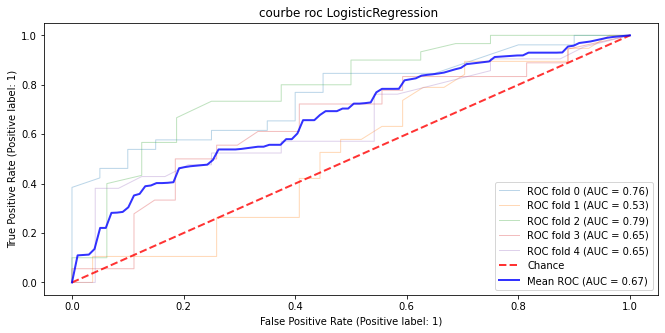

Accuracy: [0.63043478 0.52173913 0.73913043 0.64444444 0.6       ]
moy_accuracy: 0.63
precision: [0.68       0.42857143 0.8        0.55       0.57894737]
moy_precision: 0.61
sensibilité : [0.65384615 0.47368421 0.8        0.61111111 0.52380952]
moy_sensibilité: 0.61
spécificité : [0.6        0.55555556 0.625      0.66666667 0.66666667]
moy_spécificité: 0.62
MCC : [0.25263447 0.02890367 0.425      0.27386128 0.19239443]
MCC: 0.23
balanced_accuracy : [0.62692308 0.51461988 0.7125     0.63888889 0.5952381 ]
balanced_accuracy: 0.62
roc_auc : [0.76153846 0.52631579 0.78541667 0.64917695 0.64980159]
roc_auc: 0.67
cohen_kappa_scorec : [0.25239006 0.02879079 0.425      0.27272727 0.19161677]
cohen_kappa_scorec: 0.23
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

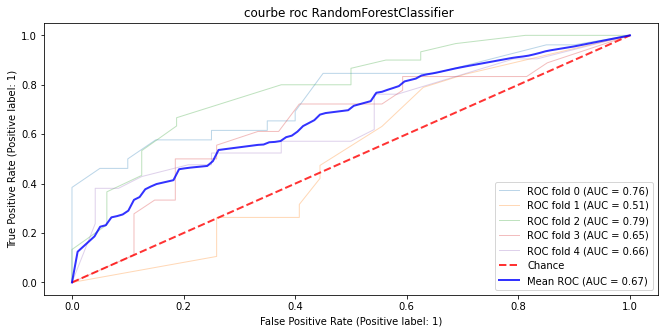

Accuracy: [0.65217391 0.47826087 0.63043478 0.64444444 0.6       ]
moy_accuracy: 0.60
precision: [0.70833333 0.35294118 0.88235294 0.58333333 0.57142857]
moy_precision: 0.62
sensibilité : [0.65384615 0.31578947 0.5        0.38888889 0.57142857]
moy_sensibilité: 0.49
spécificité : [0.65       0.59259259 0.875      0.81481481 0.625     ]
moy_spécificité: 0.71
MCC : [ 0.3015355  -0.09345783  0.37002275  0.22566773  0.19642857]
MCC: 0.20
balanced_accuracy : [0.65192308 0.45419103 0.6875     0.60185185 0.59821429]
balanced_accuracy: 0.60
roc_auc : [0.75769231 0.51364522 0.79166667 0.64917695 0.65873016]
roc_auc: 0.67
cohen_kappa_scorec : [ 0.30038023 -0.09306931  0.31523643  0.21568627  0.19642857]
cohen_kappa_scorec: 0.19
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

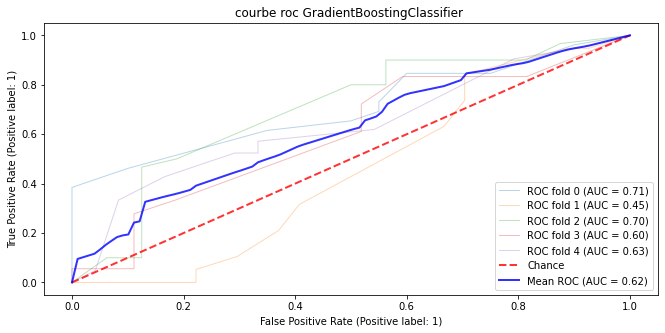

Accuracy: [0.58695652 0.47826087 0.60869565 0.53333333 0.53333333]
moy_accuracy: 0.55
precision: [0.62962963 0.35294118 0.875      0.44       0.5       ]
moy_precision: 0.56
sensibilité : [0.65384615 0.31578947 0.46666667 0.61111111 0.61904762]
moy_sensibilité: 0.53
spécificité : [0.5        0.59259259 0.875      0.48148148 0.45833333]
moy_spécificité: 0.58
MCC : [ 0.15489223 -0.09345783  0.34166667  0.09128709  0.07816024]
MCC: 0.11
balanced_accuracy : [0.57692308 0.45419103 0.67083333 0.5462963  0.53869048]
balanced_accuracy: 0.56
roc_auc : [0.70576923 0.44834308 0.69895833 0.59876543 0.63392857]
roc_auc: 0.62
cohen_kappa_scorec : [ 0.15473888 -0.09306931  0.28373702  0.08695652  0.07624633]
cohen_kappa_scorec: 0.10
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

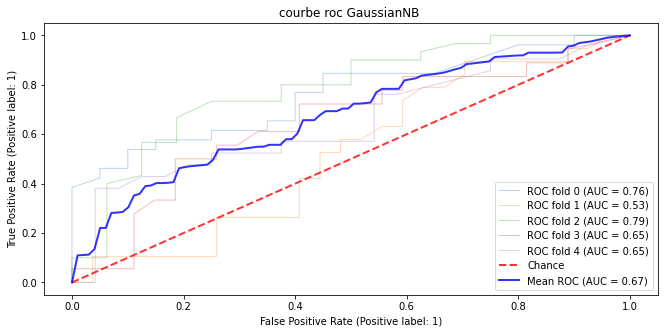

Accuracy: [0.65217391 0.5        0.65217391 0.64444444 0.62222222]
moy_accuracy: 0.61
precision: [0.75       0.4        0.88888889 0.55       0.61111111]
moy_precision: 0.64
sensibilité : [0.57692308 0.42105263 0.53333333 0.61111111 0.52380952]
moy_sensibilité: 0.53
spécificité : [0.75       0.55555556 0.875      0.66666667 0.70833333]
moy_spécificité: 0.71
MCC : [ 0.32692308 -0.02323383  0.39849253  0.27386128  0.23640271]
MCC: 0.24
balanced_accuracy : [0.66346154 0.48830409 0.70416667 0.63888889 0.61607143]
balanced_accuracy: 0.62
roc_auc : [0.76153846 0.52631579 0.78541667 0.64917695 0.64980159]
roc_auc: 0.67
cohen_kappa_scorec : [ 0.31598513 -0.02321083  0.34751773  0.27272727  0.23423423]
cohen_kappa_scorec: 0.23
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

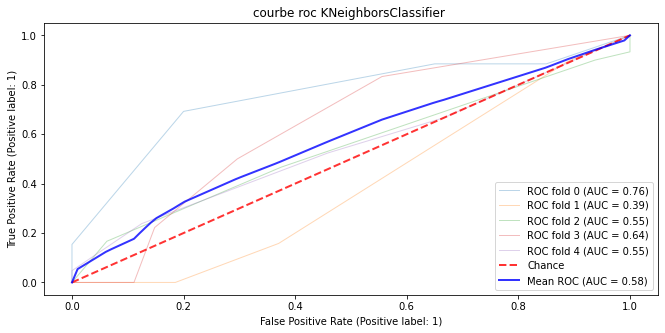

Accuracy: [0.73913043 0.43478261 0.52173913 0.62222222 0.53333333]
moy_accuracy: 0.57
precision: [0.81818182 0.36       0.7        0.52941176 0.5       ]
moy_precision: 0.58
sensibilité : [0.69230769 0.47368421 0.46666667 0.5        0.52380952]
moy_sensibilité: 0.53
spécificité : [0.8        0.40740741 0.625      0.7037037  0.54166667]
moy_spécificité: 0.62
MCC : [ 0.48856385 -0.11754157  0.08807048  0.20583233  0.06534666]
MCC: 0.15
balanced_accuracy : [0.74615385 0.44054581 0.54583333 0.60185185 0.5327381 ]
balanced_accuracy: 0.57
roc_auc : [0.75769231 0.39278752 0.54583333 0.63786008 0.54662698]
roc_auc: 0.58
cohen_kappa_scorec : [ 0.48120301 -0.11359404  0.08        0.20560748  0.0652819 ]
cohen_kappa_scorec: 0.14


In [16]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=1, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=1, max_depth=1, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe2, Y)):
         clf.fit( x_rfe2.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe2.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe2, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe2, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe2, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe2, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe2, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# Random forest

In [19]:
feature_selected3=['X_long', 'Y_lat', 'Equides', 'Arbrisseau', 'Moy_IRM', 'Max_IRM',
       'Amp1_TempJ', 'Amp2_TempJ', 'Amp1_TempN', 'Amp2_TempN', 'Min_TempN',
       'Ph1_TempN', 'Ph3_TempN', 'Var_TempN', 'Moy_NDVI', 'Amp3_NDVI',
       'VarT_ann_NDVI', 'Max_NDVI', 'Ph1_NDVI', 'Ph3_NDVI', 'Moy_EVI',
       'Amp3_EVI', 'Min_EVI', 'Ph1_EVI', 'Ph2_EVI', 'Ph3_EVI', 'Ret_eau',
       'Sol_Argile', 'Sol_Carbone_stock', 'Sol_Limon', 'Sol_Sable', 'Elev_Max',
       'Geom_Shan', 'Geom_unif', 'Pente_sd', 'IPT_Moy', 'IR_Moy', 'Isoth',
       'Bio_Saison', 'Bio_Tmin', 'Bio_Tint', 'Bio_Thum_Moy', 'Bio_Tsec_Moy',
       'Bio_Tfr_Moy', 'Bio_Pre_Ann', 'Prec_Fev', 'Prec_Mars', 'Prec_Oct',
       'Prec_Nov', 'Rad_Janv', 'Rad_Mars', 'Rad_Mai', 'Rad_Juin', 'Rad_Juill',
       'Rad_Aout', 'Rad_Sept', 'Rad_Oct', 'Rad_Nov', 'Rad_Dec', 'Tmax_Juill',
       'Tmax_Aout', 'Tmin_Fev', 'Vent_Janv', 'Vent_Juin']

In [20]:
 x_rfe3=X[feature_selected3]

In [21]:
 x_rfe3

,X_long,Y_lat,Equides,Arbrisseau,Moy_IRM,Max_IRM,Amp1_TempJ,Amp2_TempJ,Amp1_TempN,Amp2_TempN,Min_TempN,Ph1_TempN,Ph3_TempN,Var_TempN,Moy_NDVI,Amp3_NDVI,VarT_ann_NDVI,Max_NDVI,Ph1_NDVI,Ph3_NDVI,Moy_EVI,Amp3_EVI,Min_EVI,Ph1_EVI,Ph2_EVI,Ph3_EVI,Ret_eau,Sol_Argile,Sol_Carbone_stock,Sol_Limon,Sol_Sable,Elev_Max,Geom_Shan,Geom_unif,Pente_sd,IPT_Moy,IR_Moy,Isoth,Bio_Saison,Bio_Tmin,Bio_Tint,Bio_Thum_Moy,Bio_Tsec_Moy,Bio_Tfr_Moy,Bio_Pre_Ann,Prec_Fev,Prec_Mars,Prec_Oct,Prec_Nov,Rad_Janv,Rad_Mars,Rad_Mai,Rad_Juin,Rad_Juill,Rad_Aout,Rad_Sept,Rad_Oct,Rad_Nov,Rad_Dec,Tmax_Juill,Tmax_Aout,Tmin_Fev,Vent_Janv,Vent_Juin
0,-15.911420,23.794740,0.624435,0,3340,3950,96,83,102,44,14309,768,151,3,1106,2,2,1113,953,166,2906,15,2839,227,419,51,15.416667,22.250000,11.916667,19.083333,64.833333,11,0.482578,0.579282,0.308601,0.375000,1.968750,59.375002,172.263782,14.5,12.000000,22.050000,19.866667,18.383333,48,2,1,3,4,14965,21276,24920,25088,23739,23115,20888,18177,15480,13965,25.200001,26.200001,14.8,4.8,7.1
1,-13.188370,27.132950,0.040295,0,4010,4660,312,126,176,55,14311,721,104,9,1082,1,13,1090,137,171,2596,4,2570,232,243,197,13.750000,32.583333,4.916667,17.500000,52.583333,77,0.000000,1.000000,0.110143,-0.281250,1.375000,55.461394,271.167506,12.0,17.700001,20.200000,22.166667,17.450000,29,3,2,3,7,13864,19997,24082,24129,23135,22648,19999,17092,13866,12663,28.600000,29.700001,12.8,4.2,6.4
2,-13.188370,27.132950,0.040295,0,4010,4660,312,126,176,55,14311,721,104,9,1082,1,13,1090,137,171,2596,4,2570,232,243,197,13.750000,32.583333,4.916667,17.500000,52.583333,77,0.000000,1.000000,0.110143,-0.281250,1.375000,55.461394,271.167506,12.0,17.700001,20.200000,22.166667,17.450000,29,3,2,3,7,13864,19997,24082,24129,23135,22648,19999,17092,13866,12663,28.600000,29.700001,12.8,4.2,6.4
3,-13.185620,27.157940,0.269410,0,3580,4140,306,120,160,61,14315,717,109,8,1090,0,8,1094,1047,217,2578,2,2557,502,372,122,12.833333,37.916667,6.333333,18.083333,51.083333,79,1.213008,0.164062,0.739932,0.898438,9.304688,54.932949,269.975813,12.3,17.400001,20.350000,24.383334,17.616667,27,3,1,3,7,13845,20010,24019,24050,23055,22569,19979,17043,13820,12642,28.600000,29.700001,13.1,4.2,6.2
4,-13.167180,27.157730,0.379107,0,3000,3540,295,115,182,58,14309,722,112,9,1060,2,1,1064,474,123,2190,6,2043,421,21,56,15.666667,18.500000,4.750000,13.916667,73.333333,57,1.391740,0.109761,1.371832,-3.468750,7.515625,54.952379,269.473410,12.4,17.500000,20.500000,22.433334,17.750000,26,2,1,3,6,13863,19999,24002,23963,23035,22619,19925,17075,13811,12635,28.700001,29.900000,13.2,4.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-5.283333,35.633333,0.576012,0,1310,1730,0,0,0,0,0,0,0,0,1204,4,1,1213,94,146,3341,18,3191,506,379,65,13.916667,27.416667,30.000000,27.750000,45.333333,19,0.463414,0.704090,0.184193,-0.109375,2.281250,36.962365,425.336542,9.2,18.599999,13.483333,23.616666,13.483333,601,71,68,53,70,9265,15449,23352,25823,26270,23844,19111,14087,10020,8074,27.200001,27.799999,9.8,3.7,4.1
224,-5.325286,35.685852,0.577831,0,1940,2690,543,68,295,33,14112,695,36,19,1211,5,54,1276,149,334,3300,36,2936,223,239,321,14.250000,29.083333,32.000000,28.750000,39.083333,51,0.918046,0.244117,1.047491,-1.742188,6.945312,32.022471,433.512797,9.7,17.800000,14.216667,23.516667,13.250000,638,77,72,58,77,9204,15315,23262,25859,25964,23662,18795,13926,9887,8004,27.000000,27.500000,10.5,4.0,4.1
225,-5.833954,35.759465,1.795786,0,2340,3120,528,46,334,35,14132,685,90,24,1222,11,61,1292,158,323,3075,45,2863,254,401,324,13.833333,31.250000,18.250000,29.416667,33.916667,73,1.721402,0.082948,0.782154,-0.078125,7.125000,34.904017,442.277149,8.3,19.099999,13.916667,23.383333,12.816667,782,95,95,76,126,9008,15535,23675,26169,27084,24585,19350,14358,9837,7810,27.000000,27.400000,9.5,3.6,3.7
226,-5.366667,35.766667

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

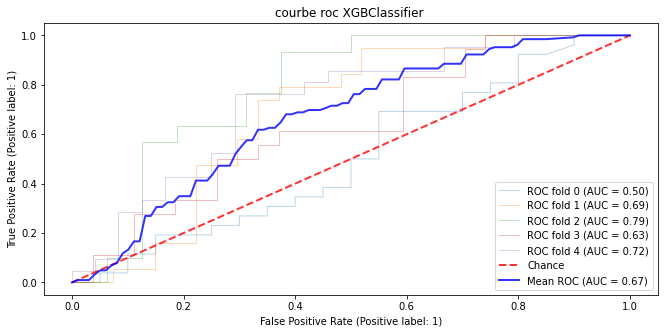

Accuracy: [0.52173913 0.69565217 0.73913043 0.48888889 0.62222222]
moy_accuracy: 0.61
precision: [0.57692308 0.60869565 0.82142857 0.40740741 0.64285714]
moy_precision: 0.61
sensibilité : [0.57692308 0.73684211 0.76666667 0.61111111 0.42857143]
moy_sensibilité: 0.62
spécificité : [0.45       0.66666667 0.6875     0.40740741 0.79166667]
moy_spécificité: 0.60
MCC : [0.02692308 0.39735971 0.44322128 0.01851852 0.23733558]
MCC: 0.22
balanced_accuracy : [0.51346154 0.70175439 0.72708333 0.50925926 0.61011905]
balanced_accuracy: 0.61
roc_auc : [0.50480769 0.68810916 0.78541667 0.63374486 0.72420635]
roc_auc: 0.67
cohen_kappa_scorec : [0.02692308 0.39130435 0.44129555 0.01709402 0.22492401]
cohen_kappa_scorec: 0.22
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

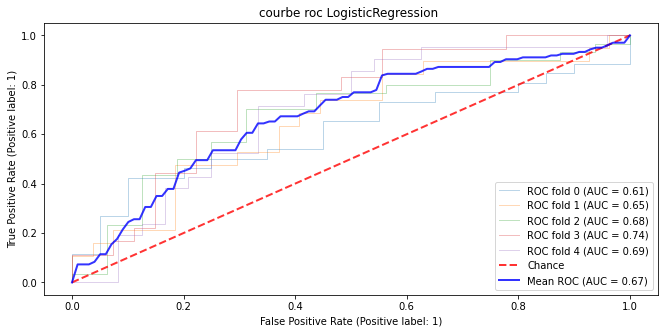

Accuracy: [0.65217391 0.60869565 0.65217391 0.62222222 0.64444444]
moy_accuracy: 0.64
precision: [0.77777778 0.52631579 0.75       0.51851852 0.61904762]
moy_precision: 0.64
sensibilité : [0.53846154 0.52631579 0.7        0.77777778 0.61904762]
moy_sensibilité: 0.63
spécificité : [0.8        0.66666667 0.5625     0.51851852 0.66666667]
moy_spécificité: 0.64
MCC : [0.34379197 0.19298246 0.25617377 0.2962963  0.28571429]
MCC: 0.27
balanced_accuracy : [0.66923077 0.59649123 0.63125    0.64814815 0.64285714]
balanced_accuracy: 0.64
roc_auc : [0.62115385 0.6588694  0.69166667 0.73868313 0.68849206]
roc_auc: 0.68
cohen_kappa_scorec : [0.32352941 0.19298246 0.25506073 0.27350427 0.28571429]
cohen_kappa_scorec: 0.27
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

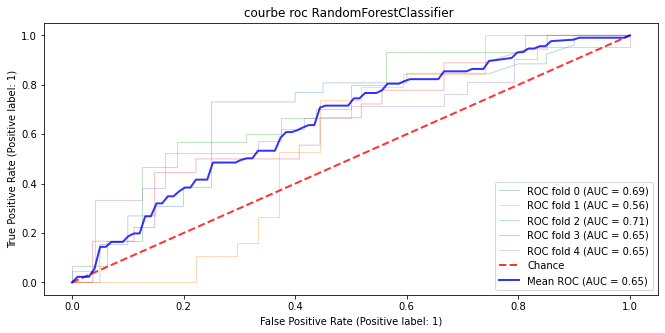

Accuracy: [0.67391304 0.54347826 0.63043478 0.6        0.62222222]
moy_accuracy: 0.61
precision: [0.7037037  0.45454545 0.76       0.5        0.59090909]
moy_precision: 0.60
sensibilité : [0.73076923 0.52631579 0.63333333 0.66666667 0.61904762]
moy_sensibilité: 0.64
spécificité : [0.6        0.55555556 0.625      0.55555556 0.625     ]
moy_spécificité: 0.59
MCC : [0.33301829 0.08070002 0.24701391 0.21821789 0.24356483]
MCC: 0.22
balanced_accuracy : [0.66538462 0.54093567 0.62916667 0.61111111 0.62202381]
balanced_accuracy: 0.61
roc_auc : [0.68653846 0.55945419 0.70833333 0.64609053 0.65277778]
roc_auc: 0.65
cohen_kappa_scorec : [0.33268859 0.08       0.2407767  0.21052632 0.24332344]
cohen_kappa_scorec: 0.22
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

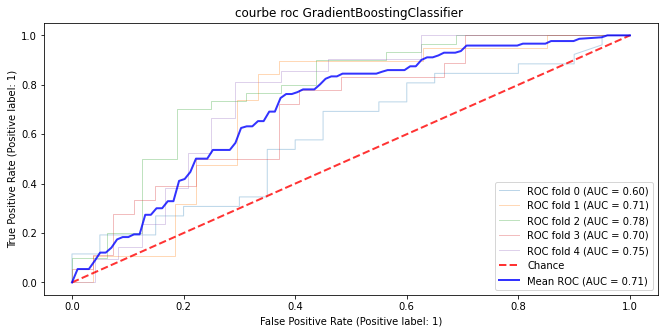

Accuracy: [0.60869565 0.7173913  0.7173913  0.66666667 0.64444444]
moy_accuracy: 0.67
precision: [0.65384615 0.63636364 0.77419355 0.56       0.64705882]
moy_precision: 0.65
sensibilité : [0.65384615 0.73684211 0.8        0.77777778 0.52380952]
moy_sensibilité: 0.70
spécificité : [0.55       0.7037037  0.5625     0.59259259 0.75      ]
moy_spécificité: 0.63
MCC : [0.20384615 0.43424297 0.36830037 0.36514837 0.28174768]
MCC: 0.33
balanced_accuracy : [0.60192308 0.7202729  0.68125    0.68518519 0.63690476]
balanced_accuracy: 0.67
roc_auc : [0.60096154 0.71150097 0.78125    0.69958848 0.75      ]
roc_auc: 0.71
cohen_kappa_scorec : [0.20384615 0.43047619 0.36786469 0.34782609 0.27710843]
cohen_kappa_scorec: 0.33
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

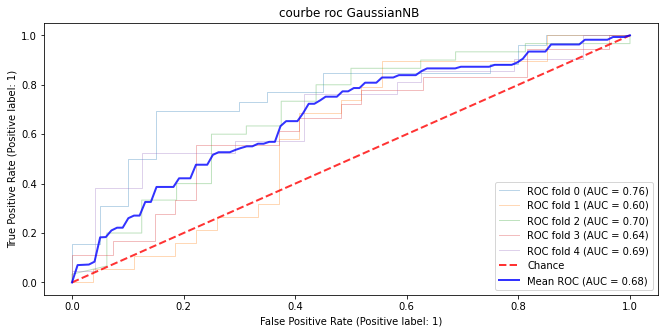

Accuracy: [0.67391304 0.60869565 0.7173913  0.6        0.6       ]
moy_accuracy: 0.64
precision: [0.66666667 0.51724138 0.72972973 0.5        0.56521739]
moy_precision: 0.60
sensibilité : [0.84615385 0.78947368 0.9        0.77777778 0.61904762]
moy_sensibilité: 0.79
spécificité : [0.45       0.48148148 0.375      0.48148148 0.58333333]
moy_spécificité: 0.47
MCC : [0.32605465 0.27639658 0.33016512 0.26196842 0.20198059]
MCC: 0.28
balanced_accuracy : [0.64807692 0.63547758 0.6375     0.62962963 0.60119048]
balanced_accuracy: 0.63
roc_auc : [0.76153846 0.59844055 0.696875   0.64197531 0.69246032]
roc_auc: 0.68
cohen_kappa_scorec : [0.30861723 0.25135624 0.3062645  0.23728814 0.20118343]
cohen_kappa_scorec: 0.26
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

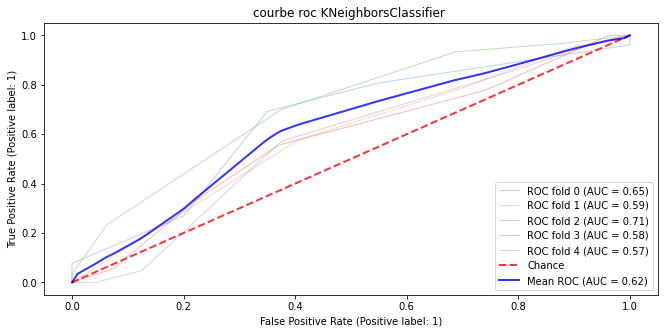

Accuracy: [0.67391304 0.58695652 0.67391304 0.6        0.6       ]
moy_accuracy: 0.63
precision: [0.72       0.5        0.77777778 0.5        0.57142857]
moy_precision: 0.61
sensibilité : [0.69230769 0.57894737 0.7        0.55555556 0.57142857]
moy_sensibilité: 0.62
spécificité : [0.65       0.59259259 0.625      0.62962963 0.625     ]
moy_spécificité: 0.62
MCC : [0.34067376 0.16908576 0.31437304 0.18257419 0.19642857]
MCC: 0.24
balanced_accuracy : [0.67115385 0.58576998 0.6625     0.59259259 0.59821429]
balanced_accuracy: 0.62
roc_auc : [0.65480769 0.58966862 0.71041667 0.5781893  0.57142857]
roc_auc: 0.62
cohen_kappa_scorec : [0.34034417 0.16761905 0.31137725 0.18181818 0.19642857]
cohen_kappa_scorec: 0.24


In [22]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=1, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe3, Y)):
         clf.fit( x_rfe3.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe3.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe3, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe3, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe3, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe3, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe3, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# gradient boostnig

In [23]:
feature_selected4=['Equides', 'Ph3_IRM', 'Moy_TempN', 'Amp3_TempN', 'Min_NDVI', 'Max_NDVI',
       'Ph1_NDVI', 'Amp3_EVI', 'Ret_eau', 'Sol_Carbone_stock', 'Sol_Limon',
       'Geom_unif', 'IPT_Med', 'Prec_Fev', 'Prec_Mars', 'Rad_Oct', 'Tmin_Oct',
       'Tmin_Dec', 'Vap_Oct']

In [24]:
 x_rfe4=X[feature_selected4]

In [25]:
 x_rfe4

,Equides,Ph3_IRM,Moy_TempN,Amp3_TempN,Min_NDVI,Max_NDVI,Ph1_NDVI,Amp3_EVI,Ret_eau,Sol_Carbone_stock,Sol_Limon,Geom_unif,IPT_Med,Prec_Fev,Prec_Mars,Rad_Oct,Tmin_Oct,Tmin_Dec,Vap_Oct
0,0.624435,231,14436,5,1097,1113,953,15,15.416667,11.916667,19.083333,0.579282,-0.1875,2,1,18177,18.799999,15.2,2.02
1,0.040295,49,14516,18,1076,1090,137,4,13.750000,4.916667,17.500000,1.000000,-0.5000,3,2,17092,17.799999,12.8,1.95
2,0.040295,49,14516,18,1076,1090,137,4,13.750000,4.916667,17.500000,1.000000,-0.5000,3,2,17092,17.799999,12.8,1.95
3,0.269410,106,14512,21,1086,1094,1047,2,12.833333,6.333333,18.083333,0.164062,1.5625,3,1,17043,18.100000,13.1,1.97
4,0.379107,64,14526,14,1049,1064,474,6,15.666667,4.750000,13.916667,0.109761,-3.7500,2,1,17075,18.200001,13.2,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.576012,11,0,0,1187,1213,94,18,13.916667,30.000000,27.750000,0.704090,-0.8750,71,68,14087,16.600000,10.8,1.71
224,0.577831,50,14379,3,1150,1276,149,36,14.250000,32.000000,28.750000,0.244117,-1.6875,77,72,13926,16.900000,10.9,1.71
225,1.795786,76,14451,5,1142,1292,158,45,13.833333,18.250000,29.416667,0.082948,-0.1875,95,95,14358,16.500000,10.4,1.64
226,0.698221,241,14347,1,1389,1604,140,110,13.416667,41.250000,26.916667,0.205729,1.3125,98,88,13856,16.100000,10.5,1.65


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

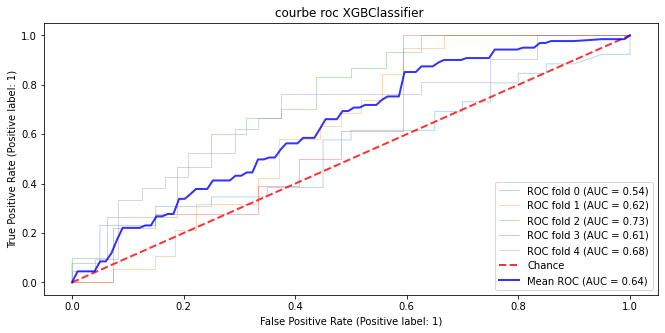

Accuracy: [0.54347826 0.58695652 0.69565217 0.55555556 0.66666667]
moy_accuracy: 0.61
precision: [0.60869565 0.5        0.76666667 0.45833333 0.6875    ]
moy_precision: 0.60
sensibilité : [0.53846154 0.57894737 0.76666667 0.61111111 0.52380952]
moy_sensibilité: 0.60
spécificité : [0.55       0.59259259 0.5625     0.51851852 0.79166667]
moy_spécificité: 0.60
MCC : [0.0877058  0.16908576 0.32916667 0.12729377 0.32879323]
MCC: 0.21
balanced_accuracy : [0.54423077 0.58576998 0.66458333 0.56481481 0.6577381 ]
balanced_accuracy: 0.60
roc_auc : [0.54134615 0.61988304 0.73125    0.6090535  0.68452381]
roc_auc: 0.64
cohen_kappa_scorec : [0.08695652 0.16761905 0.32916667 0.12280702 0.32024169]
cohen_kappa_scorec: 0.21
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

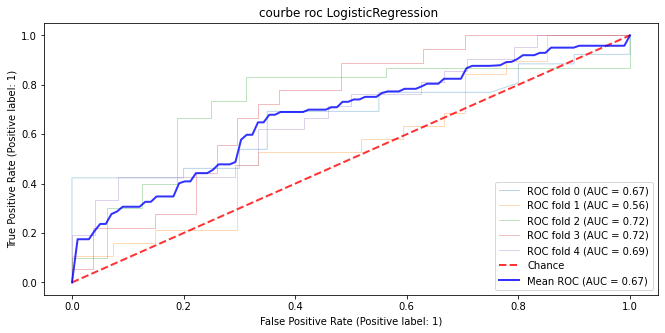

Accuracy: [0.65217391 0.58695652 0.73913043 0.64444444 0.66666667]
moy_accuracy: 0.66
precision: [0.70833333 0.5        0.84615385 0.55555556 0.8       ]
moy_precision: 0.68
sensibilité : [0.65384615 0.47368421 0.73333333 0.55555556 0.38095238]
moy_sensibilité: 0.56
spécificité : [0.65       0.66666667 0.75       0.7037037  0.91666667]
moy_spécificité: 0.74
MCC : [0.3015355  0.14159847 0.46437165 0.25925926 0.35714286]
MCC: 0.30
balanced_accuracy : [0.65192308 0.57017544 0.74166667 0.62962963 0.64880952]
balanced_accuracy: 0.65
roc_auc : [0.67019231 0.55750487 0.725      0.72016461 0.68650794]
roc_auc: 0.67
cohen_kappa_scorec : [0.30038023 0.14145383 0.45669291 0.25925926 0.30769231]
cohen_kappa_scorec: 0.29
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

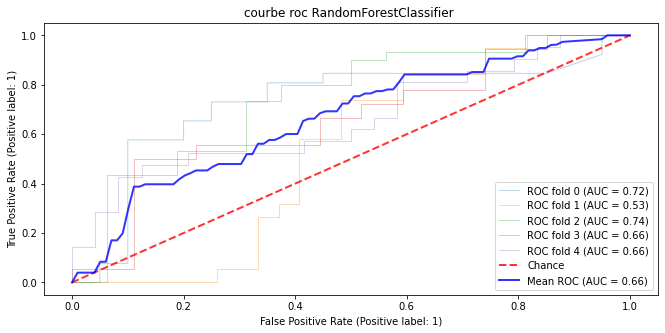

Accuracy: [0.7173913  0.58695652 0.69565217 0.57777778 0.57777778]
moy_accuracy: 0.63
precision: [0.80952381 0.5        0.80769231 0.47826087 0.54545455]
moy_precision: 0.63
sensibilité : [0.65384615 0.57894737 0.7        0.61111111 0.57142857]
moy_sensibilité: 0.62
spécificité : [0.8        0.59259259 0.6875     0.55555556 0.58333333]
moy_spécificité: 0.64
MCC : [0.45167981 0.16908576 0.37229796 0.16333965 0.15445575]
MCC: 0.26
balanced_accuracy : [0.72692308 0.58576998 0.69375    0.58333333 0.57738095]
balanced_accuracy: 0.63
roc_auc : [0.725      0.53021442 0.74375    0.6563786  0.66071429]
roc_auc: 0.66
cohen_kappa_scorec : [0.4411215  0.16761905 0.36614173 0.15929204 0.15430267]
cohen_kappa_scorec: 0.26
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

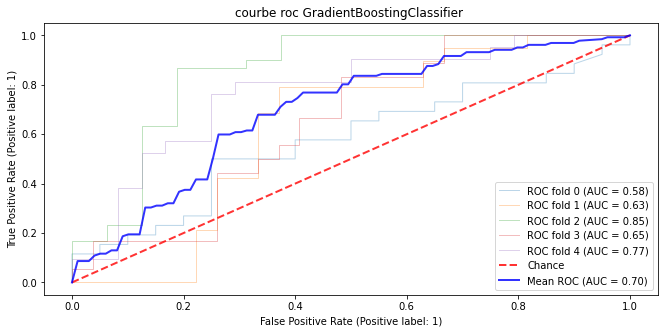

Accuracy: [0.58695652 0.67391304 0.84782609 0.6        0.71111111]
moy_accuracy: 0.68
precision: [0.68421053 0.59090909 0.89655172 0.5        0.75      ]
moy_precision: 0.68
sensibilité : [0.5        0.68421053 0.86666667 0.61111111 0.57142857]
moy_sensibilité: 0.65
spécificité : [0.7        0.66666667 0.8125     0.59259259 0.83333333]
moy_spécificité: 0.72
MCC : [0.2013599  0.34585723 0.67015231 0.19963735 0.42184792]
MCC: 0.37
balanced_accuracy : [0.6        0.6754386  0.83958333 0.60185185 0.70238095]
balanced_accuracy: 0.68
roc_auc : [0.57596154 0.62768031 0.85416667 0.65020576 0.76785714]
roc_auc: 0.70
cohen_kappa_scorec : [0.1922366  0.34285714 0.66940452 0.19642857 0.41087613]
cohen_kappa_scorec: 0.36
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

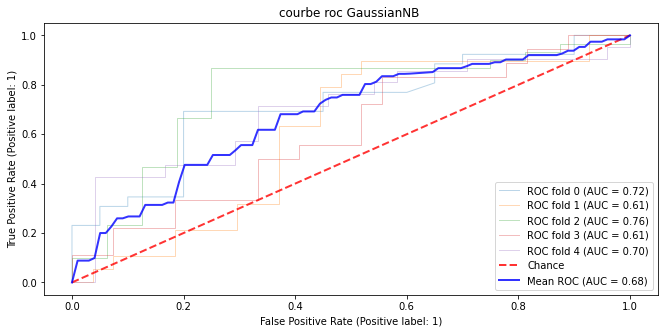

Accuracy: [0.60869565 0.63043478 0.67391304 0.55555556 0.62222222]
moy_accuracy: 0.62
precision: [0.625      0.54545455 0.69230769 0.45454545 0.625     ]
moy_precision: 0.59
sensibilité : [0.76923077 0.63157895 0.9        0.55555556 0.47619048]
moy_sensibilité: 0.67
spécificité : [0.4        0.62962963 0.25       0.55555556 0.75      ]
moy_spécificité: 0.52
MCC : [0.18232322 0.25747149 0.19889806 0.1088931  0.23573854]
MCC: 0.20
balanced_accuracy : [0.58461538 0.63060429 0.575      0.55555556 0.61309524]
balanced_accuracy: 0.59
roc_auc : [0.71826923 0.60623782 0.76041667 0.60699588 0.69642857]
roc_auc: 0.68
cohen_kappa_scorec : [0.1752988  0.2552381  0.17266187 0.10714286 0.22960725]
cohen_kappa_scorec: 0.19
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

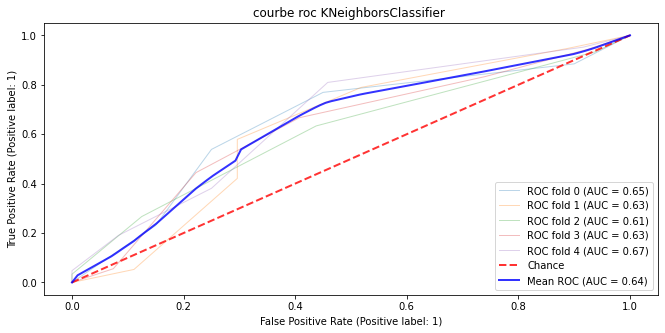

Accuracy: [0.63043478 0.65217391 0.60869565 0.62222222 0.57777778]
moy_accuracy: 0.62
precision: [0.73684211 0.57894737 0.73076923 0.52173913 0.57142857]
moy_precision: 0.63
sensibilité : [0.53846154 0.57894737 0.63333333 0.66666667 0.38095238]
moy_sensibilité: 0.56
spécificité : [0.75       0.7037037  0.5625     0.59259259 0.75      ]
moy_spécificité: 0.67
MCC : [0.29042293 0.28265107 0.18815058 0.2540839  0.14111845]
MCC: 0.23
balanced_accuracy : [0.64423077 0.64132554 0.59791667 0.62962963 0.56547619]
balanced_accuracy: 0.62
roc_auc : [0.65288462 0.62865497 0.61145833 0.62860082 0.66666667]
roc_auc: 0.64
cohen_kappa_scorec : [0.27726433 0.28265107 0.18503937 0.24778761 0.1337386 ]
cohen_kappa_scorec: 0.23


In [26]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=1, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe4, Y)):
         clf.fit( x_rfe4.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe4.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe4, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe4, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe4, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe4, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe4, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))